## (Analyzing Ford GoBike)
## by (Adel Almutairi)

## Preliminary Wrangling

>  **Ford GoBike is the Bay Area's new bike share system, with thousands of public bikes for use across the greater San Francisco Bay area. An app was also created to co-piloting for getting around town. Ford has also introduced an ebike called Ford GoBike Plus on April 24th 2018 which is a motorized bike rides. I would think that this would attract more people to ride the bikes without breaking a sweat. For more information on this program, please go to https://www.fordgobike.com I have divided this project into 2 parts:.**

In [71]:
import pandas as pd
import numpy as np
import seaborn as sb
import glob
import os
import datetime
import calendar
import math
import matplotlib.ticker as tick
import seaborn as sns

from matplotlib import pyplot as plt

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

## I saved the csv files from the FordGoBike website in one location on my computer. I then used the glob and os modules to store, load, and combine the files into one new file, fordgo_master.csv:

path = r'C:\Users\am.almutairi\Desktop\final project'

using glob to combine files
files = glob.glob(os.path.join(path, "*.csv"))


df = pd.concat((pd.read_csv(f) for f in files), ignore_index = True)


df.to_csv('fordgo_master.csv', index = False)

In [72]:
# read fordgo master file
df = pd.read_csv('fordgo_master.csv')

In [73]:
# check first 5 records
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [74]:
# Sampling the data
df.sample(100)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
81667,1805,2018-01-06 09:25:49.4770,2018-01-06 09:55:55.0860,81.0,Berry St at 4th St,37.775880,-122.393170,126.0,Esprit Park,37.761634,-122.390648,2338,Subscriber,1980.0,Male,No
1529377,749,2018-10-11 07:49:47.5370,2018-10-11 08:02:17.0650,81.0,Berry St at 4th St,37.775880,-122.393170,16.0,Steuart St at Market St,37.794130,-122.394430,472,Subscriber,1984.0,Male,No
227627,201,2018-03-26 13:08:51.0940,2018-03-26 13:12:12.8110,98.0,Valencia St at 16th St,37.765052,-122.421866,76.0,McCoppin St at Valencia St,37.771662,-122.422423,2612,Subscriber,1987.0,Male,No
557413,218,2018-05-11 18:14:16.0380,2018-05-11 18:17:54.4760,191.0,Market St at 40th St,37.830545,-122.273937,192.0,37th St at West St,37.826696,-122.271795,118,Subscriber,1994.0,Male,Yes
1095953,664,2018-08-19 16:41:26.0830,2018-08-19 16:52:30.4460,120.0,Mission Dolores Park,37.761420,-122.426435,97.0,14th St at Mission St,37.768265,-122.420110,3181,Subscriber,1986.0,Male,No
1329744,660,2018-09-12 14:31:47.2380,2018-09-12 14:42:47.3850,273.0,Fulton St at Ashby Ave,37.855574,-122.263565,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,3582,Subscriber,1996.0,Male,No
247992,395,2018-03-20 12:25:02.9650,2018-03-20 12:31:38.6240,310.0,San Fernando St at 4th St,37.335885,-121.885660,305.0,Ryland Park,37.342725,-121.895617,2198,Subscriber,1992.0,Male,Yes
644491,441,2018-06-27 18:41:35.6950,2018-06-27 18:48:57.3910,9.0,Broadway at Battery St,37.798572,-122.400869,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2929,Subscriber,1968.0,Male,No
966312,564,2018-07-10 08:51:34.3040,2018-07-10 09:00:58.3550,58.0,Market St at 10th St,37.776619,-122.417385,19.0,Post St at Kearny St,37.788975,-122.403452,1034,Subscriber,1995.0,Male,No
982878,649,2018-07-07 12:52:21.2720,2018-07-07 13:03:11.2640,76.0,McCoppin St at Valencia St,37.771662,-122.422423,120.0,Mission Dolores Park,37.761420,-122.426435,1107,Subscriber,1996.0,Female,No


In [75]:
# checking describe
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.753003e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03,1.983088e+03
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03,1.044289e+01
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01,1.881000e+03
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03,1.978000e+03
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03,1.985000e+03
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03,1.991000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03,2.000000e+03


In [76]:
# View info of the dataframe
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               1863721 non-null int64
start_time                 1863721 non-null object
end_time                   1863721 non-null object
start_station_id           1851950 non-null float64
start_station_name         1851950 non-null object
start_station_latitude     1863721 non-null float64
start_station_longitude    1863721 non-null float64
end_station_id             1851950 non-null float64
end_station_name           1851950 non-null object
end_station_latitude       1863721 non-null float64
end_station_longitude      1863721 non-null float64
bike_id                    1863721 non-null int64
user_type                  1863721 non-null object
member_birth_year          1753003 non-null float64
member_gender              1753354 non-null object
bike_share_for_all_trip    1863721 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


In [77]:
# check for any duplicates
df.duplicated().sum()

0

In [78]:
# check the shape of the dataset
df.shape

(1863721, 16)

In [79]:
# check the NaN values
df.isna().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            11771
start_station_name          11771
start_station_latitude          0
start_station_longitude         0
end_station_id              11771
end_station_name            11771
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year          110718
member_gender              110367
bike_share_for_all_trip         0
dtype: int64

**Quality issues**


- Starting and ending times to the timestamp format

- User type, gender, and bike share for all to category format

- Bike ID, start station ID, and end station ID to object format

**Cleaning Data**

In [80]:
# create copies of original DataFrames
df_clean = df.copy()
df_bike_copy = df.copy()

In [81]:
# verifying the Changes made above 

df_bike_copy.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            11771
start_station_name          11771
start_station_latitude          0
start_station_longitude         0
end_station_id              11771
end_station_name            11771
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year          110718
member_gender              110367
bike_share_for_all_trip         0
dtype: int64

In [82]:
# verifying the change 

df_bike_copy.shape

(1863721, 16)

In [83]:
# changing the format to datetime
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

In [84]:
# set user type, gender and bike_share_for_all_trip to category
df_clean.user_type = df_clean.user_type.astype('category')
df_clean.member_gender = df_clean.member_gender.astype('category')
df_clean.bike_share_for_all_trip = df_clean.bike_share_for_all_trip.astype('category')

In [85]:
# set bike id, start_station_id, end_station_id to object
df_clean.bike_id = df_clean.bike_id.astype(str)
df_clean.start_station_id = df_clean.bike_id.astype(str)
df_clean.end_station_id = df_clean.bike_id.astype(str)

**Test**

In [86]:
df_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               1863721 non-null int64
start_time                 1863721 non-null datetime64[ns]
end_time                   1863721 non-null datetime64[ns]
start_station_id           1863721 non-null object
start_station_name         1851950 non-null object
start_station_latitude     1863721 non-null float64
start_station_longitude    1863721 non-null float64
end_station_id             1863721 non-null object
end_station_name           1851950 non-null object
end_station_latitude       1863721 non-null float64
end_station_longitude      1863721 non-null float64
bike_id                    1863721 non-null object
user_type                  1863721 non-null category
member_birth_year          1753003 non-null float64
member_gender              1753354 non-null category
bike_share_for_all_trip    1863721 non-null category
dtypes: category(3), datetime64[ns](2), float

**Define: Calculate the age of each member by subtracting their birth year from the current year**

In [87]:
# Subtracting the member_birth_year from the current year to get the ages of the members

df_clean['member_age'] = 2018 - df_clean['member_birth_year']

**Test**

In [88]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,2765,Mission Dolores Park,37.761420,-122.426435,2765,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No,32.0
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,2815,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No,NaN
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,3039,Jackson St at 5th St,37.348759,-121.894798,3039,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No,22.0
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,321,Market St at Franklin St,37.773793,-122.421239,321,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No,NaN
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,617,Laguna St at Hayes St,37.776435,-122.426244,617,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No,27.0


**Enhance dataset with new date related field**

In [89]:
# changing the format to datetime
df_clean['start_time_date']=df_clean['start_time'].dt.date
df_clean['end_time_date']=df_clean['end_time'].dt.date

In [90]:
# set start_time_year_month to Y-m format
df_clean['start_time_year_month']=df_clean['start_time'].map(lambda x: x.strftime('%Y-%m'))
df_clean['end_time_year_month']=df_clean['end_time'].map(lambda x: x.strftime('%Y-%m'))

In [91]:
# set start time year to object
df_clean['start_time_year']=df_clean['start_time'].dt.year.astype(int)
df_clean['end_time_year']=df_clean['end_time'].dt.year.astype(int)

In [92]:
# set start time month to object
df_clean['start_time_month']=df_clean['start_time'].dt.month.astype(int)
df_clean['end_time_month']=df_clean['end_time'].dt.month.astype(int)

In [93]:
# set start time hour minute to H-m format
df_clean['start_time_hour_minute']=df_clean['start_time'].map(lambda x: x.strftime('%H-%m'))
df_clean['end_time_hour_minute']=df_clean['end_time'].map(lambda x: x.strftime('%H-%m'))

In [94]:
# changing 'start_time_hour format to datetime
df_clean['start_time_hour']=df_clean['start_time'].dt.hour
df_clean['end_time_hour']=df_clean['end_time'].dt.hour

In [95]:
# changing start_time_weekday format to datetime
df_clean['start_time_weekday']=df_clean['start_time'].dt.weekday_name
df_clean['end_time_weekday']=df_clean['end_time'].dt.weekday_name

In [96]:
# start_time_weekday_abbr for calender
df_clean['start_time_weekday_abbr']=df_clean['start_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])
df_clean['end_time_weekday_abbr']=df_clean['end_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])

In [97]:
# Duration in seconds to duration in minutes
df_clean['duration_min'] = df_clean['duration_sec']/60
df_clean['duration_min'] = df_clean['duration_min'].astype(int)

**Test**

In [98]:
df_clean['duration_min'].sample(10)

1862900     46
1408839     18
1065696     10
1708626      3
16897        3
835644     193
856790      18
545810       3
1655377      9
151526      25
Name: duration_min, dtype: int32

**Test**

In [99]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,end_time_month,start_time_hour_minute,end_time_hour_minute,start_time_hour,end_time_hour,start_time_weekday,end_time_weekday,start_time_weekday_abbr,end_time_weekday_abbr,duration_min
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,2765,Mission Dolores Park,37.761420,-122.426435,2765,Webster St at O'Farrell St,37.783521,...,2,22-01,19-02,22,19,Wednesday,Thursday,Wed,Thu,1254
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,2815,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,2,16-01,15-02,16,15,Wednesday,Thursday,Wed,Thu,1423
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,3039,Jackson St at 5th St,37.348759,-121.894798,3039,5th St at Virginia St,37.325998,...,2,14-01,10-02,14,10,Wednesday,Thursday,Wed,Thu,1192
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,321,Market St at Franklin St,37.773793,-122.421239,321,4th St at Harrison St,37.780955,...,2,14-01,07-02,14,7,Wednesday,Thursday,Wed,Thu,1017
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,617,Laguna St at Hayes St,37.776435,-122.426244,617,Post St at Kearny St,37.788975,...,2,19-01,06-02,19,6,Wednesday,Thursday,Wed,Thu,666


***Generate new fields for distance***

In [100]:
#Calculations are derived from the 'haversine' formula which is 
#used to calculate the great-circle distance between tow points, i.e. the shortest distance over the earth's surface
def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [101]:
## Converting the kilometers to miles
df['distance_km_estimates'] = df.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)
df['distance_miles_estimates'] = df['distance_km_estimates']*0.621371

**Define: Clean up the ages of members -  Since 99% of users are ages 66 and below, I will just keep that proportion of users by keeping users 66 and below**

In [102]:
# Checking the ave of age member 
df_clean.member_age.mean()

34.91203780027758

In [103]:
# Checking
df_clean.member_age.describe()

count    1.753003e+06
mean     3.491204e+01
std      1.044289e+01
min      1.800000e+01
25%      2.700000e+01
50%      3.300000e+01
75%      4.000000e+01
max      1.370000e+02
Name: member_age, dtype: float64

In [104]:
# Checking of percentiles = [.99]
df_clean.member_age.describe(percentiles = [.99])

count    1.753003e+06
mean     3.491204e+01
std      1.044289e+01
min      1.800000e+01
50%      3.300000e+01
99%      6.500000e+01
max      1.370000e+02
Name: member_age, dtype: float64

In [105]:
# Only keep the events where riders were under 60 years of age
df_clean = df_clean.query('member_age <= 60')


In [106]:
# Convert the member_age and birth year to integer format
df_clean.member_age = df_clean.member_age.astype(int)
df_clean.member_birth_year = df_clean.member_birth_year.astype(int)

In [107]:
# Chcking
df_clean.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,end_time_month,start_time_hour_minute,end_time_hour_minute,start_time_hour,end_time_hour,start_time_weekday,end_time_weekday,start_time_weekday_abbr,end_time_weekday_abbr,duration_min
805900,1046,2018-06-03 12:40:48.713,2018-06-03 12:58:15.147,493,Rhode Island St at 17th St,37.764478,-122.402570,493,Father Alfred E Boeddeker Park,37.783988,...,6,12-06,12-06,12,12,Sunday,Sunday,Sun,Sun,17
1750839,1262,2018-12-25 22:21:51.000,2018-12-25 22:42:53.655,4773,Lombard St at Columbus Ave,37.802746,-122.413579,4773,3rd St at Townsend St,37.778742,...,12,22-12,22-12,22,22,Tuesday,Tuesday,Tue,Tue,21
7709,441,2018-01-30 09:40:35.663,2018-01-30 09:47:57.466,156,Howard St at Beale St,37.789756,-122.394643,156,5th St at Howard St,37.781752,...,1,09-01,09-01,9,9,Tuesday,Tuesday,Tue,Tue,7
298569,699,2018-03-06 08:40:15.182,2018-03-06 08:51:54.992,1966,Victoria Manalo Draves Park,37.777791,-122.406432,1966,Spear St at Folsom St,37.789677,...,3,08-03,08-03,8,8,Tuesday,Tuesday,Tue,Tue,11
1783612,166,2018-12-17 19:31:02.295,2018-12-17 19:33:48.980,5014,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,5014,Townsend St at 7th St,37.771058,...,12,19-12,19-12,19,19,Monday,Monday,Mon,Mon,2
929417,731,2018-07-15 16:17:24.853,2018-07-15 16:29:36.048,145,Valencia St at 16th St,37.765052,-122.421866,145,Valencia St at Cesar Chavez St,37.747998,...,7,16-07,16-07,16,16,Sunday,Sunday,Sun,Sun,12
696942,438,2018-06-20 08:54:46.084,2018-06-20 09:02:04.122,4030,11th St at Natoma St,37.773507,-122.416040,4030,Powell St BART Station (Market St at 4th St),37.786375,...,6,08-06,09-06,8,9,Wednesday,Wednesday,Wed,Wed,7
1560107,10987,2018-10-06 07:27:31.275,2018-10-06 10:30:38.568,1130,Victoria Manalo Draves Park,37.777791,-122.406432,1130,The Embarcadero at Sansome St,37.804770,...,10,07-10,10-10,7,10,Saturday,Saturday,Sat,Sat,183
1694408,468,2018-11-07 07:53:11.450,2018-11-07 08:01:00.162,266,8th St at Ringold St,37.774520,-122.409449,266,S Van Ness Ave at Market St,37.774814,...,11,07-11,08-11,7,8,Wednesday,Wednesday,Wed,Wed,7
246571,237,2018-03-20 19:46:55.926,2018-03-20 19:50:53.925,3278,Grand Ave at Perkins St,37.808894,-122.256460,3278,Grand Ave at Santa Clara Ave,37.812744,...,3,19-03,19-03,19,19,Tuesday,Tuesday,Tue,Tue,3


In [108]:
# Checking the avarage
df_clean.member_age.describe()

count    1.716307e+06
mean     3.421336e+01
std      9.263722e+00
min      1.800000e+01
25%      2.700000e+01
50%      3.200000e+01
75%      3.900000e+01
max      6.000000e+01
Name: member_age, dtype: float64

In [109]:
df_clean.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1716307 entries, 0 to 1863719
Data columns (total 34 columns):
duration_sec               1716307 non-null int64
start_time                 1716307 non-null datetime64[ns]
end_time                   1716307 non-null datetime64[ns]
start_station_id           1716307 non-null object
start_station_name         1704912 non-null object
start_station_latitude     1716307 non-null float64
start_station_longitude    1716307 non-null float64
end_station_id             1716307 non-null object
end_station_name           1704912 non-null object
end_station_latitude       1716307 non-null float64
end_station_longitude      1716307 non-null float64
bike_id                    1716307 non-null object
user_type                  1716307 non-null category
member_birth_year          1716307 non-null int32
member_gender              1716307 non-null category
bike_share_for_all_trip    1716307 non-null category
member_age                 1716307 non-null int

### What is the structure of your dataset?

> There were approximately 1,850,000 bike rides in the San Francisco Bay area of California, USA documented

### What is/are the main feature(s) of interest in your dataset?

> Average duration of trips

> Number of daily bike rides

> Gender, and user type

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Trip Duration (seconds), Start Time and Date , End Time and Date, User Type , Member Year of Birth , Member Gender

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

 ### 1- What is the average duration of trips ?

Text(0, 0.5, 'Frequency')

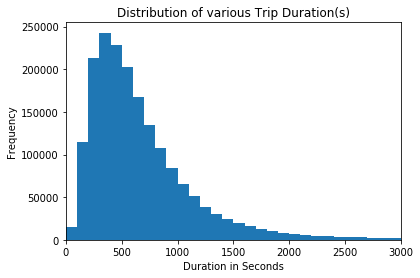

In [110]:
# Here we plot the distribution of trip durations in seconds from 0 to 3000


binedges = np.arange(0, df_bike_copy['duration_sec'].max() + 100 , 100)
plt.hist(data = df_bike_copy , x = 'duration_sec' , bins = binedges)
plt.xlim(0,3000)
plt.title('Distribution of various Trip Duration(s)')
plt.xlabel('Duration in Seconds')
plt.ylabel('Frequency')

> **The distribution of various trip duartion on seconds so will change it to mins to be more understandble**



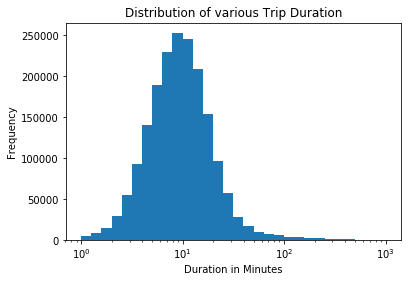

In [111]:
 # Here I converted the trip durations from seconds to minutes by dividing it to 60 seconds and get result  of trip duration

df_bike_copy['duration_min'] = df_bike_copy['duration_sec'] / 60
df_bike_copy.drop('duration_sec' , axis = 1 , inplace = True)

binedges = 10**np.arange(0 , 3+0.1 , 0.1)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df_bike_copy , x = 'duration_min' , bins = binedges);
plt.xticks(ticks,labels);
plt.title('Distribution of various Trip Duration')
plt.xlabel('Duration in Minutes');
plt.ylabel('Frequency')
plt.xscale('log');

**As we can see above in the chart the most people taking bikes time (trip) is about 10 mins**



### 2- daily trend of bike rides

In [112]:
# Count of daily bike rides from July to November by using tick
# Tick is floating-point numbers in units of seconds for time interval are indicated
def transform_axis_fmt(tick_val, pos):
    if tick_val >= 1000:
        val = int(tick_val/1000)
        return '{:d}K'.format(val)
    elif tick_val >= 1000000: 
        val = int(tick_val/1000000)
        return '{:d}M'.format(val)
    else:
        return int(tick_val)

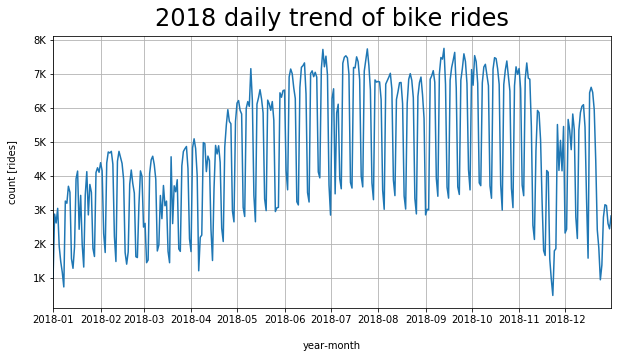

In [113]:
# Here I made an image by using group by between start time date and bike id to figur out the daily trend of bike rides
df_clean.groupby('start_time_date').agg('count')['bike_id'].plot(kind = 'line', figsize = [10, 5])
plt.title('2018 daily trend of bike rides', fontsize=24, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))
plt.grid()


**As you can see above , the daily trends of cyclists riding bikes. the number of cyclists above 4k in one month**

### 3-Monthly usage of the bike share system

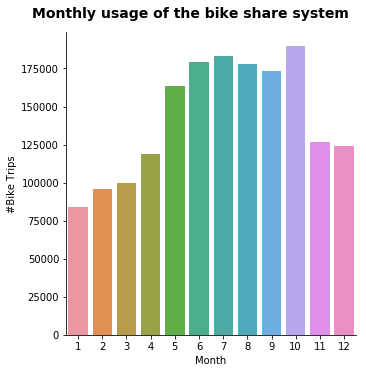

In [114]:
# using sns library for start time monrh to make chart of monthly usage of the bike share system
g = sns.catplot(data=df_clean, x='start_time_month', kind='count')
g.set_axis_labels("Month", "#Bike Trips")
g.fig.suptitle('Monthly usage of the bike share system', y=1.03, fontsize=14, fontweight='semibold');

**in the summer months and early-mid autumn are the most popular times to use the Ford Go Bike sharing system. October is the most popular month, with July as the second most popular, and June/August coming in closely as the third most popular months to use the bike system**

### 4- weekday usege of the bike sharing system

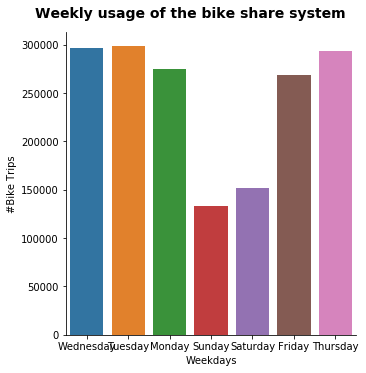

In [115]:
# using sns library to make chart of weekly usage of the bike share system
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=df_clean, x='start_time_weekday', kind='count')
g.set_axis_labels("Weekdays", "#Bike Trips")
g.fig.suptitle('Weekly usage of the bike share system', y=1.03, fontsize=14, fontweight='semibold');

**It looks like the most popular days that cyclists ride their bikes is tuesday and wednesday.
The system is most probably used as a daily work/school commute**

### 5- hourly usege of the bike sharing system

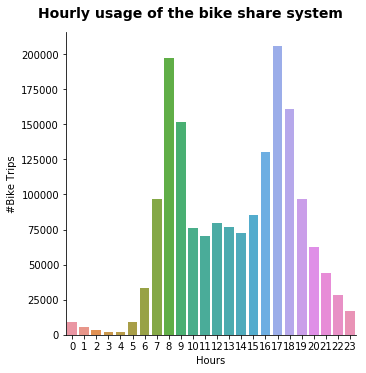

In [116]:
# using library sns to make chart of Hourly usage of the bike share system
g = sns.catplot(data=df_clean, x='start_time_hour', kind='count')
g.set_axis_labels("Hours", "#Bike Trips")
g.fig.suptitle('Hourly usage of the bike share system', y=1.03, fontsize=14, fontweight='semibold');

**The bikes saw the most usage during the morning hours of 8-9am, and in the afternoon hours of 5-6pm, which is a typical workday in the United States. This furthers the suggestion that the bikes are being used primarily for commuters**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The unusual point is the duration of the bike ride, it gave a hard time to figure out the suration in secondes but it did change ti mins to be more clear.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There was one unusal distribution for the member birth year, which in some cases was dated before 1900. Since 95% of the members are between 17 and 57 years, I removed users older than 66.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### In this section I will further explore the dataset by figuring the age group of bike riders and adding the customer type to the analysis.

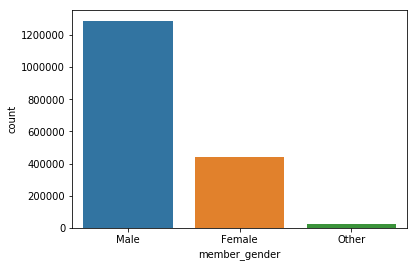

In [117]:
# First I want to compare between member of geneder to start looking deep and explore the custome type
sb.countplot(data = df, x = 'member_gender')

**There are significantly more males cyclists than females and other genders**

### 1- Bike rides per member age group

In [118]:
# Here I want to explore the age of mebmber group and using if and else from 20 year old to 60 year old 
df_clean['member_age_bins'] = df_clean['member_age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else x)

In [119]:
# Here I defined the trip by age to member of age and bike id
trip_by_age_df = df_clean.groupby('member_age_bins').agg({'bike_id':'count'})

In [120]:
# Then I calculated it by 100 to get my result
trip_by_age_df['perc'] = (trip_by_age_df['bike_id']/trip_by_age_df['bike_id'].sum())*100

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

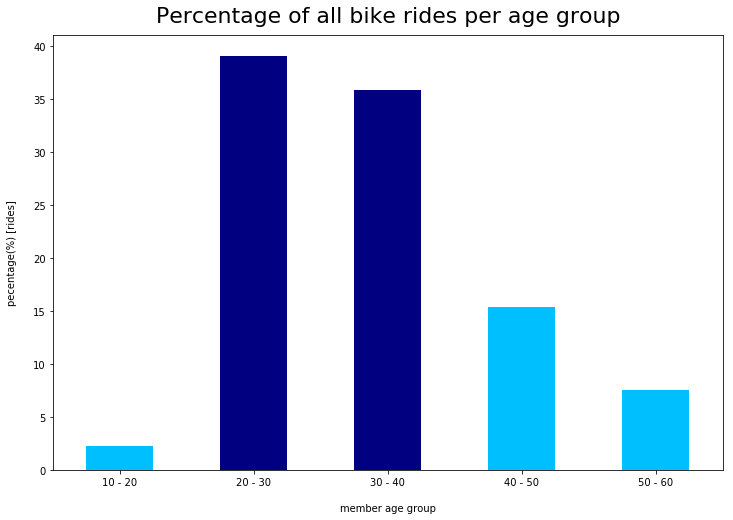

In [121]:
# seeing the age for member age group
new_color = ['deepskyblue', 'navy', 'navy', 'deepskyblue', 'deepskyblue']
trip_by_age_df['perc'].plot(kind='bar', color=new_color, figsize=(12,8))
plt.title('Percentage of all bike rides per age group', fontsize=22, y=1.015)
plt.xlabel('member age group', labelpad=16)
plt.ylabel('pecentage(%) [rides]', labelpad=16)
plt.xticks(rotation=360)


**20 to 40 years old people took the more than 70% of bike rides. 
Among those, 30 to 40 years old people's rides account for 40% of all bike rides**

### 2- How does subscribers and customers behave differently?

In [122]:
# Here I defined the count of riders per user type and group by user type 
count_of_rides_per_user_type = df_clean.groupby('user_type').size().reset_index(name='count')

In [123]:
# Here I used query for user type and customer and subscriber to bike id and then define customer_proportion & subscriber_proportion 
customer = df_clean.query('user_type == "Customer"')['bike_id'].count()
subscriber = df_clean.query('user_type == "Subscriber"')['bike_id'].count()

customer_proportion = customer / df_clean['bike_id'].count()
subscriber_proportion = subscriber / df_clean['bike_id'].count()

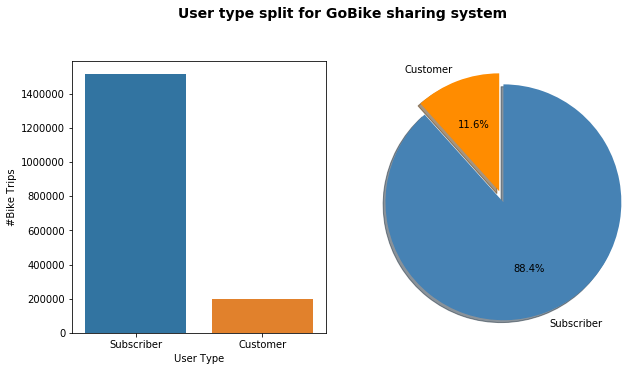

In [124]:
# Here I wanna figure out the user type for go bike and get the percentage of customer and subscriber
plt.figure(figsize = [10, 5])

# code for the bar chart
plt.subplot(1, 2, 1)

g = sns.countplot(data=df_clean, x="user_type", order=df_clean.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('#Bike Trips')

# code for the pie chart
plt.subplot(1, 2, 2)

labels = ['Customer', 'Subscriber']
sizes = [customer_proportion, subscriber_proportion]
colors = ['darkorange', 'steelblue']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.suptitle('User type split for GoBike sharing system', y=1.03, fontsize=14, fontweight='semibold');

**92% of bike rides are from subscribers. On the contrary, 7.3% is from customers**

### 3- Average trip duration per user type

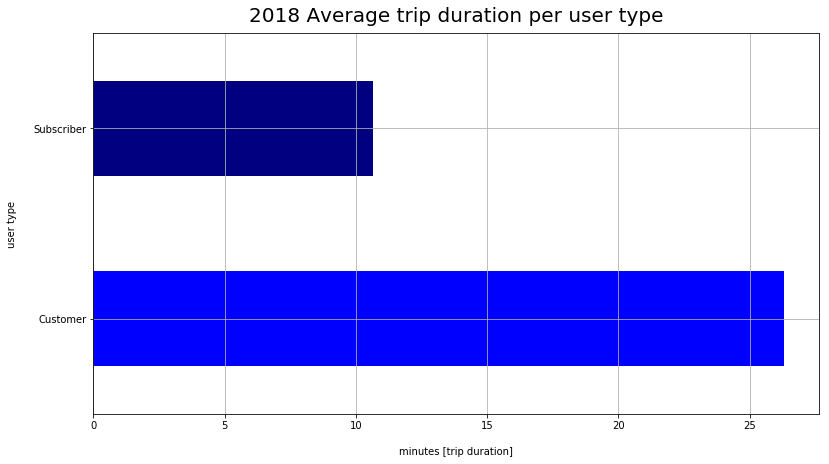

In [125]:
# Here is the trip duration per user type by min for customer & and customr 
new_color=['blue', 'navy']
ax = df_clean.groupby('user_type')['duration_min'].mean().plot(kind='barh', color=new_color, figsize=(13,7))
ax.set_title('2018 Average trip duration per user type', fontsize=20, y=1.015)
ax.set_ylabel('user type', labelpad=16)
ax.set_xlabel('minutes [trip duration]', labelpad=16)
plt.grid()


**As we can deduce from this graph and the one previous, it is understandable that the subscribers has the most frequent rides is because they have shorter trips as opposed to the customerswho has less frequent rides since it takes them longer to ride to their destination**

### 4- Monthly usage of the bike share system

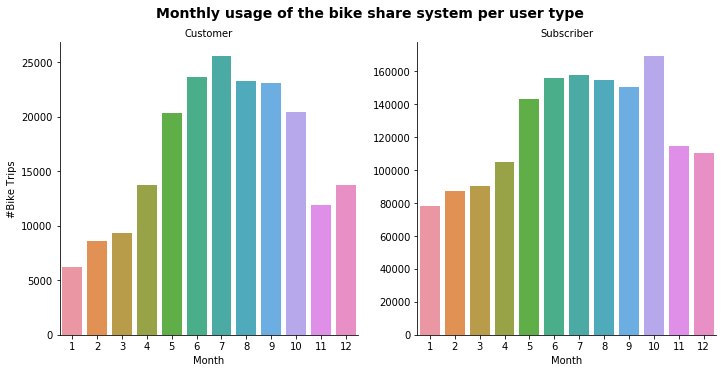

In [126]:
# I want to defind the monthly usage of bike share by pliting start time month and user type to get the result by a month
g = sns.catplot(data=df_clean, x='start_time_month', col="user_type", kind='count', sharey = False)
            
g.set_axis_labels("Month", "#Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Monthly usage of the bike share system per user type', y=1.03, fontsize=14, fontweight='semibold');


**Customers: demand is high around summertime, reaching its peak in July. Customers are most probably tourists, or the occasional riders who visit the Bay Area.
Subscribers: the highest demand is from May till October, reaching it's peak in October. Subscribers are most likely riders using the bikes for their daily commute**

### 5- weekday usege of the bike sharing system

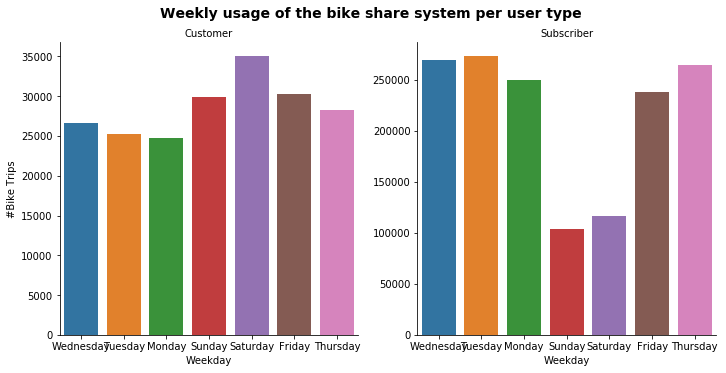

In [127]:
# Here is the same but I want to determine the weekday usage by pluting start time weekday

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=df_clean, x='start_time_weekday', col="user_type", kind='count' , sharey = False)
          
g.set_axis_labels("Weekday", "#Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Weekly usage of the bike share system per user type', y=1.03, fontsize=14, fontweight='semibold');

**Customers have a relatively low usage of the bike share system with a small increase on the weekends. Subscribers are the opposite**

### 6- hourly usege of the bike sharing system

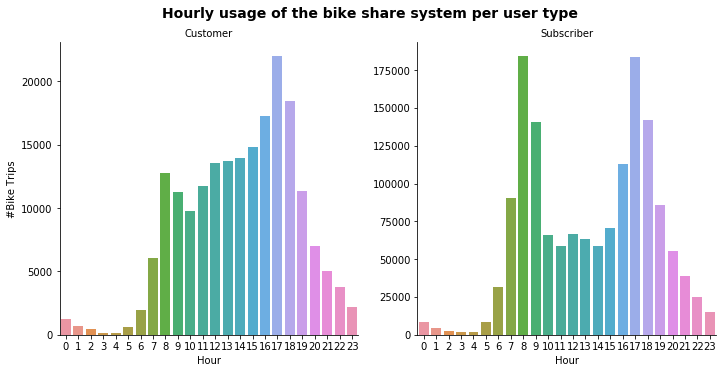

In [128]:
# Then I look forward to hourly usage by plutting start time hour 

g = sns.catplot(data=df_clean, x='start_time_hour', col="user_type", kind='count', sharey = False)
           
g.set_axis_labels("Hour", "#Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage of the bike share system per user type', y=1.03, fontsize=14, fontweight='semibold');

**The bike used from 8-9am and 5-6pm when people get to and gat back from work**

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Adding the user type to the analysis revealed different behavior usage between customers and subscribers. The data suggests that customers are casual riders such as tourists, or students on a school vacation or holiday

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> it is understandable that the subscribers has the most frequent rides is because they have shorter trips as opposed to the customerswho has less frequent rides since it takes them longer to ride to their destination

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### in this section I will explore user trends of bike rides of subscribers vs customers, average trip distance of subscribers vs customers and the trend of subscribers' bike rides per age group

***Relationships between pairs of variables in the data***

### 1- User trends of bike rides of subscribers vs customers

In [134]:
# comparing start time year month by user type for the whole year
df_clean.user_type_count_per_year = df_clean.groupby(["start_time_year_month", "user_type"]).size().reset_index()

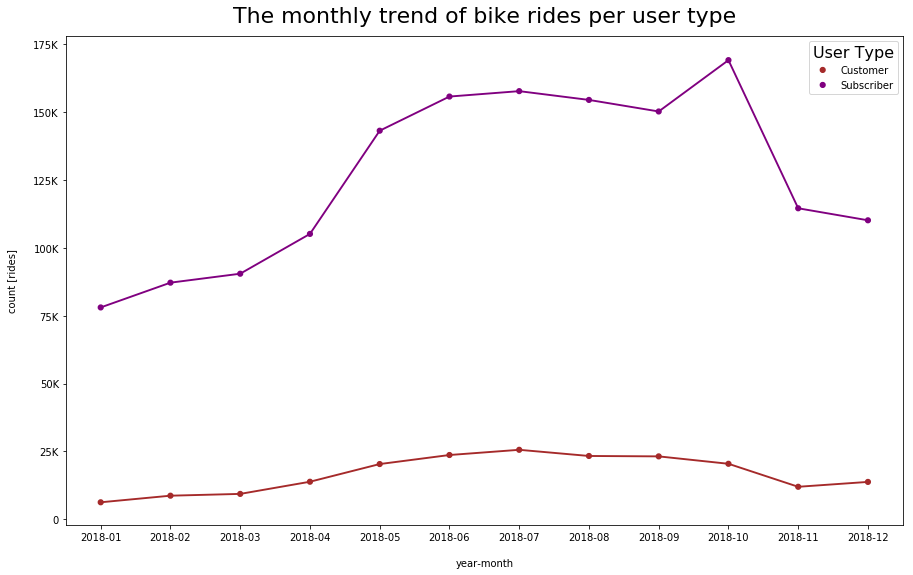

In [130]:
# Here I want to see the monthy trend of bike riders by customer and subscriber
plt.figure(figsize=(15,9))
my_palette = {'Subscriber':'purple', 'Customer':'brown'}
ax = sns.pointplot(x='start_time_year_month', y=0, hue='user_type', palette=my_palette, scale=.7, data=df_clean.user_type_count_per_year )
plt.title('The monthly trend of bike rides per user type', fontsize=22, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
leg = ax.legend()
leg.set_title('User Type',prop={'size':16})
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))


**Customers' rides seems increasing slightly. There is a decrease on November 2018 for subscribers but it seems like it is related with winter season**

### 2-  Average trip distance of subscribers vs customers

Text(0.5, 0, 'miles [distance]')

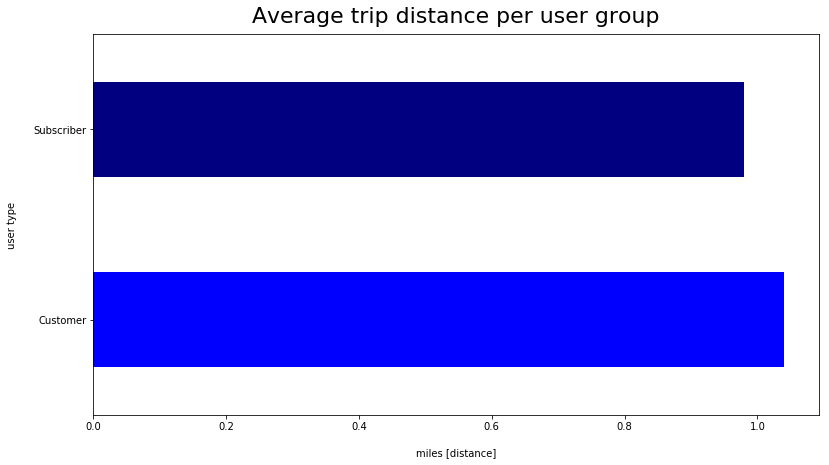

In [131]:
# groupby user type with distance_miles_estimates to get result of average trip distance per user group
ax = df.groupby('user_type')['distance_miles_estimates'].mean().plot(kind='barh', color=new_color, figsize=(13,7))
ax.set_title('Average trip distance per user group', fontsize=22, y=1.015)
ax.set_ylabel('user type', labelpad=16)
ax.set_xlabel('miles [distance]', labelpad=16)

**Subscribers and customers trip distance were about the same, which is slightly more than one mile**

### 3- The trend of subscribers' bike rides per age group

In [132]:
# comparing customer age by user type with start_time_year_month & member age
df_clean.customer_age = df_clean[df_clean['user_type']=='Customer'].groupby(['start_time_year_month', 'member_age_bins']).agg({'bike_id':'count'}).reset_index()

C:\Users\am.almutairi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


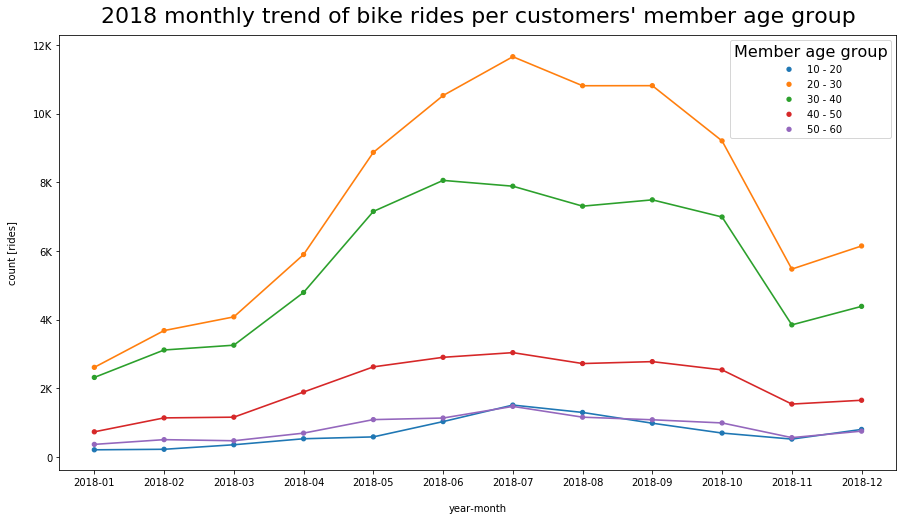

In [133]:
# Here I did further to see bike riders per cusotmers & member age of group
plt.figure(figsize=(15,8))
ax = sb.pointplot(x='start_time_year_month', y='bike_id', hue='member_age_bins', 
                  scale=.6, data=df_clean.customer_age)
plt.title("2018 monthly trend of bike rides per customers' member age group", fontsize=22, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
leg = ax.legend()
leg.set_title('Member age group',prop={'size':16})
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> T that Customers' rides seems increasing slightly and subscribers and customers trip distance were about the same, which is slightly more than one mile.
### Were there any interesting or surprising interactions between features?

> It 's interesting because in my data I did an anlaysis between subscribers and customer and I did figured there is different data between each other. It depends on other things like weather and timining.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!